In [2]:
import sys
import os
import numpy as np
# Get the current directory of the notebook
notebook_dir = os.getcwd()

# Add the parent directory to sys.path
parent_dir = os.path.abspath(os.path.join(notebook_dir, '..'))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
# Add the 2nd level parent directory to sys.path
parent_dir = os.path.abspath(os.path.join(parent_dir, '..'))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import bemt_param_fitter
import inflow_model.propeller_lookup_table as propeller_lookup_table

Prepare data for fitting. 

In [3]:
import data_factory

fitting_subfolder = "wind_near_wall_bemt_fitting"
factory = data_factory.FittingFactory()
data_list = data_factory.generate_data_list(fitting_subfolder, '.pkl')
print(f"Fitting Data list:")
for data in data_list:
    print(data)
datasets = factory.prepare_datasets(data_list)

fitting_subfolder = "wind_near_wall_bemt_fitting_validation"
factory = data_factory.FittingFactory()
data_list = data_factory.generate_data_list(fitting_subfolder, '.pkl')
print(f"Validtion Data list:")
for data in data_list:
    print(data)
datasets_validation = factory.prepare_datasets(data_list)

Fitting Data list:
wind_near_wall_bemt_fitting\test_wind_near_wall_x0_0_y0_0_z0_0_d100_4_fitting.pkl
wind_near_wall_bemt_fitting\test_wind_near_wall_x0_0_y0_0_z5_0_d100_4_fitting.pkl
wind_near_wall_bemt_fitting\test_wind_near_wall_x0_0_y0_0_zn5_0_d100_4_fitting.pkl
wind_near_wall_bemt_fitting\test_wind_near_wall_xn3_0_y0_0_z0_0_d100_4_fitting.pkl
wind_near_wall_bemt_fitting\test_wind_near_wall_xn3_0_y0_0_z5_0_d100_4_fitting.pkl
wind_near_wall_bemt_fitting\test_wind_near_wall_xn3_0_y0_0_zn5_0_d100_4_fitting.pkl
Validtion Data list:
wind_near_wall_bemt_fitting_validation\test_wind_near_wall_x0_0_y0_0_z10_0_d0_5_validation.pkl
wind_near_wall_bemt_fitting_validation\test_wind_near_wall_x0_0_y0_0_z1_0_d0_5_validation.pkl
wind_near_wall_bemt_fitting_validation\test_wind_near_wall_x0_0_y0_0_z4_0_d0_5_validation.pkl
wind_near_wall_bemt_fitting_validation\test_wind_near_wall_x0_0_y0_0_zn10_0_d0_5_validation.pkl
wind_near_wall_bemt_fitting_validation\test_wind_near_wall_x0_0_y0_0_zn1_0_d0_5_vali

In [3]:
blade = bemt_param_fitter.FittedBlade()
fitted_params = bemt_param_fitter.fit_params(datasets, blade, np.array([5.31194203, 1.46627105, 1.72517079, 0.45174155]), is_fine_tune=True)

Initial guess: [5.31194203 1.46627105 1.72517079 0.45174155]
Current loss: 1.0115670603444145
Current loss: 1.8461955730699395
Current loss: 1.465012444989493
Current loss: 1.0328489069418547
Current loss: 2.6461612898841986
Current loss: 2.4001818304475666
Current loss: 1.6244123228506913
Step 1: x = [5.31194203 1.46627105 1.72517079 0.45174155]
Current loss: 1.9866337912211725
Current loss: 1.344515374315194
Step 2: x = [5.31194203 1.46627105 1.72517079 0.45174155]
Current loss: 1.5003891621531054
Current loss: 1.2809204383701516
Step 3: x = [5.31194203 1.46627105 1.72517079 0.45174155]
Current loss: 1.0234372574981105
Step 4: x = [5.31194203 1.46627105 1.72517079 0.45174155]
Current loss: 0.832854373594834
Current loss: 0.8849827264903748
Step 5: x = [5.20650724 1.43401738 1.79504526 0.45663836]
Current loss: 0.8596707503535365
Step 6: x = [5.20650724 1.43401738 1.79504526 0.45663836]
Current loss: 0.8313268915795285
Current loss: 0.845565585252393
Step 7: x = [5.28675051 1.38951198

KeyboardInterrupt: 

In [1]:
x = np.array([5.3, 1.7, 1.8, np.radians(20.6)]) # ground truth
# x = np.array([2., 4.33202413, 0., 0.17453294])    # initial guess from below
# x = np.array([5.34535047, 1.49428897, 1.63329779, 0.46934187])   # initial guess from above
bemt_param_fitter.get_loss(x, datasets_validation, blade, is_in_validation=True)

NameError: name 'np' is not defined

Generate a lookup table using inflow_model.propeller_lookup_table_users_guide.ipynb and check the loss over all sammple data.

[PropellerLookupTable] Reading data from ..\..\inflow_model\lookup_table\apc_8x6_fitted.yaml
loss: 7.2996218991871205, loss_x: 0.004208524610397476, loss_y: 0.0010184246060550945, loss_z: 7.294394949970665


7.2996218991871205

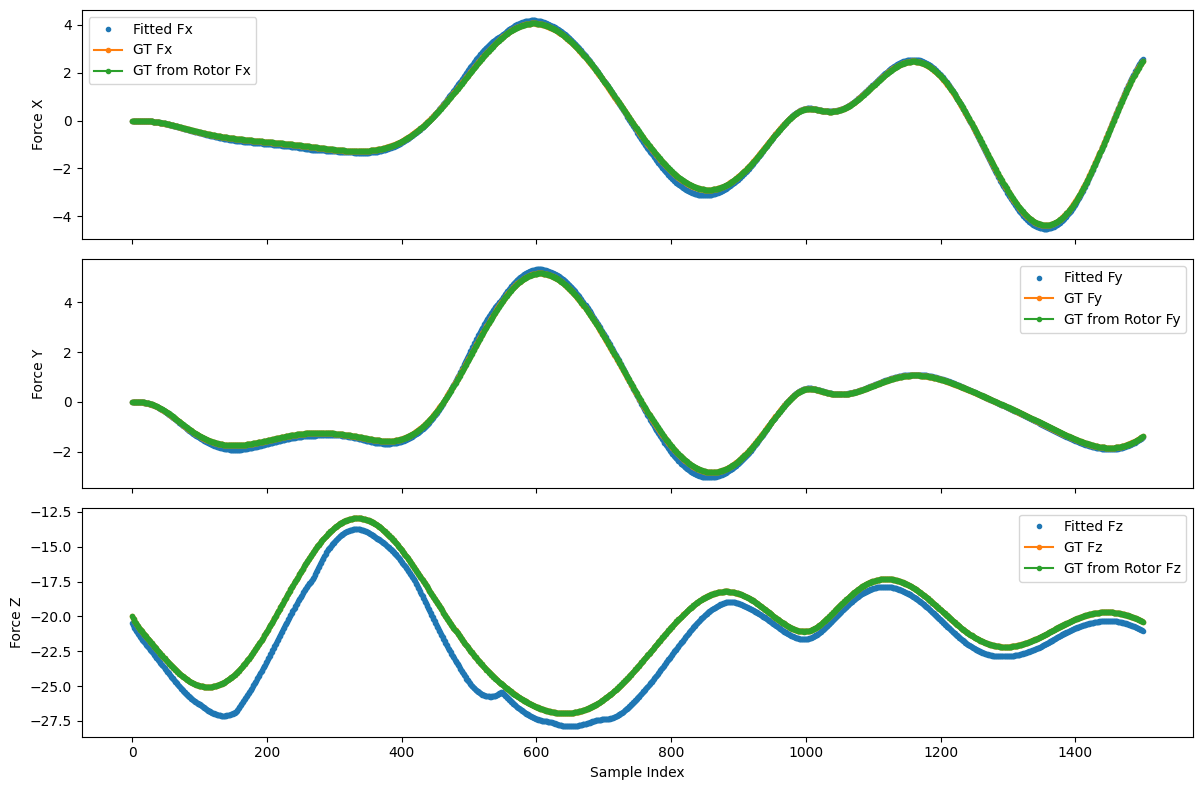

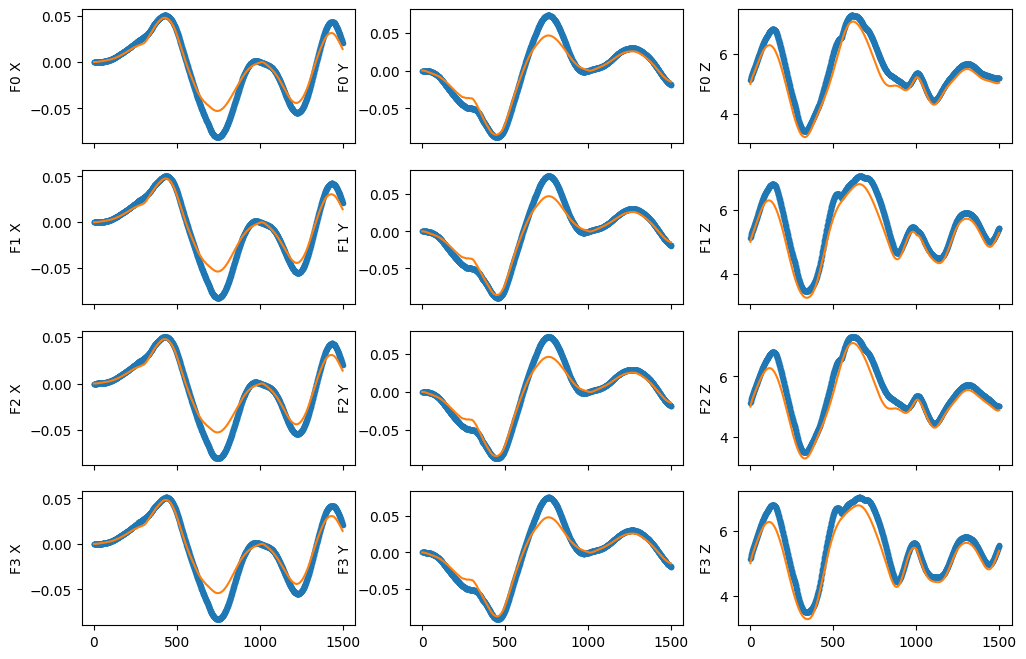

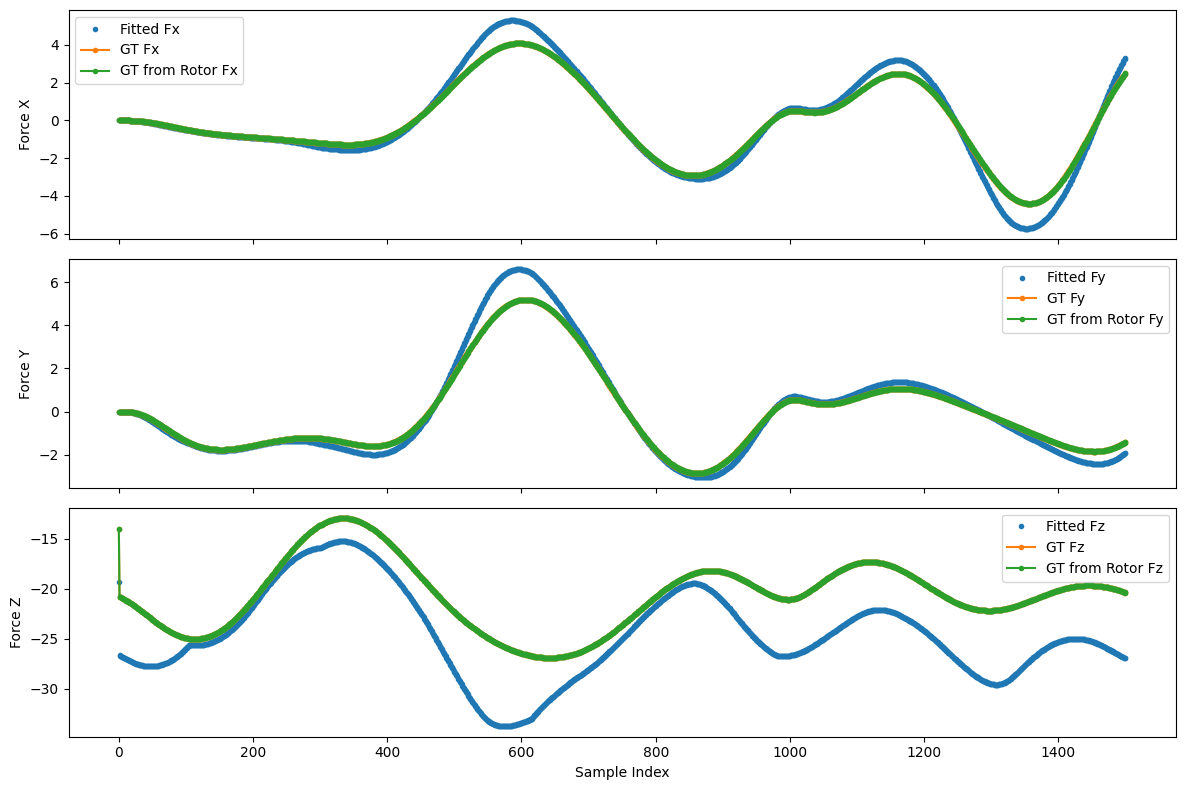

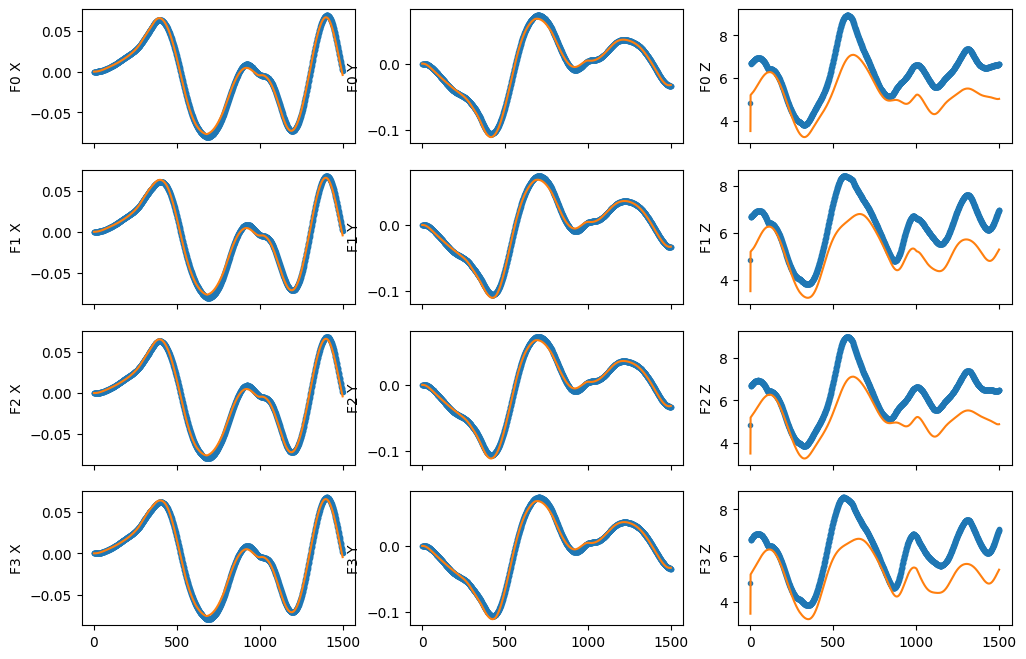

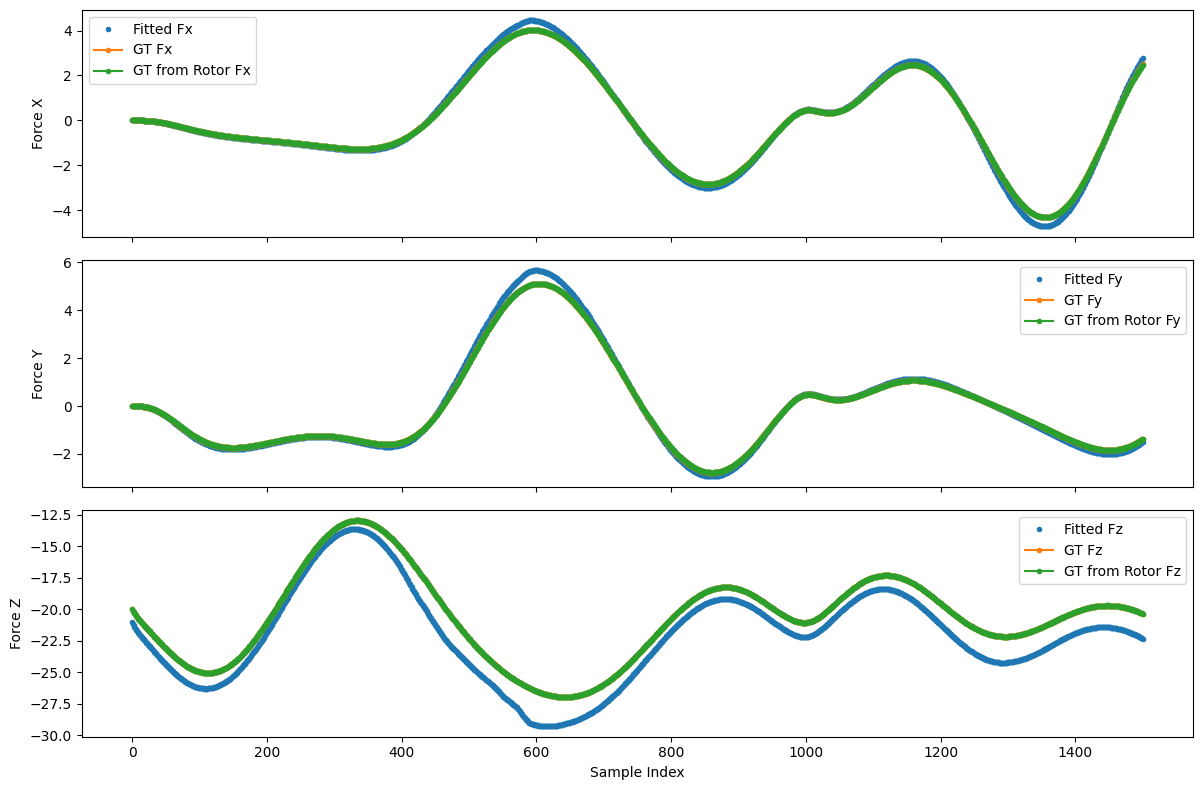

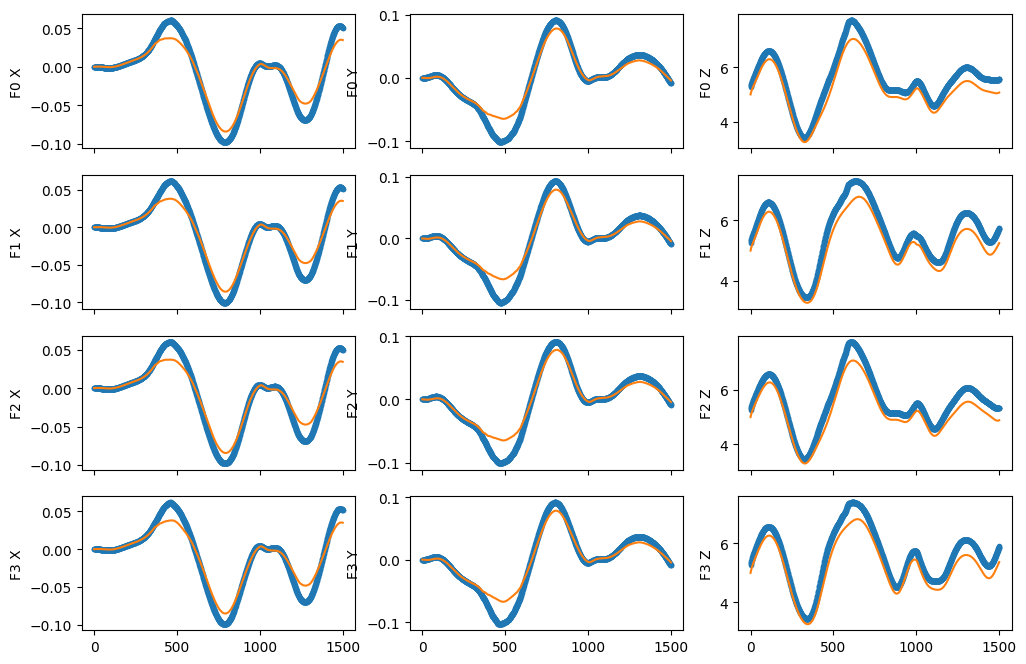

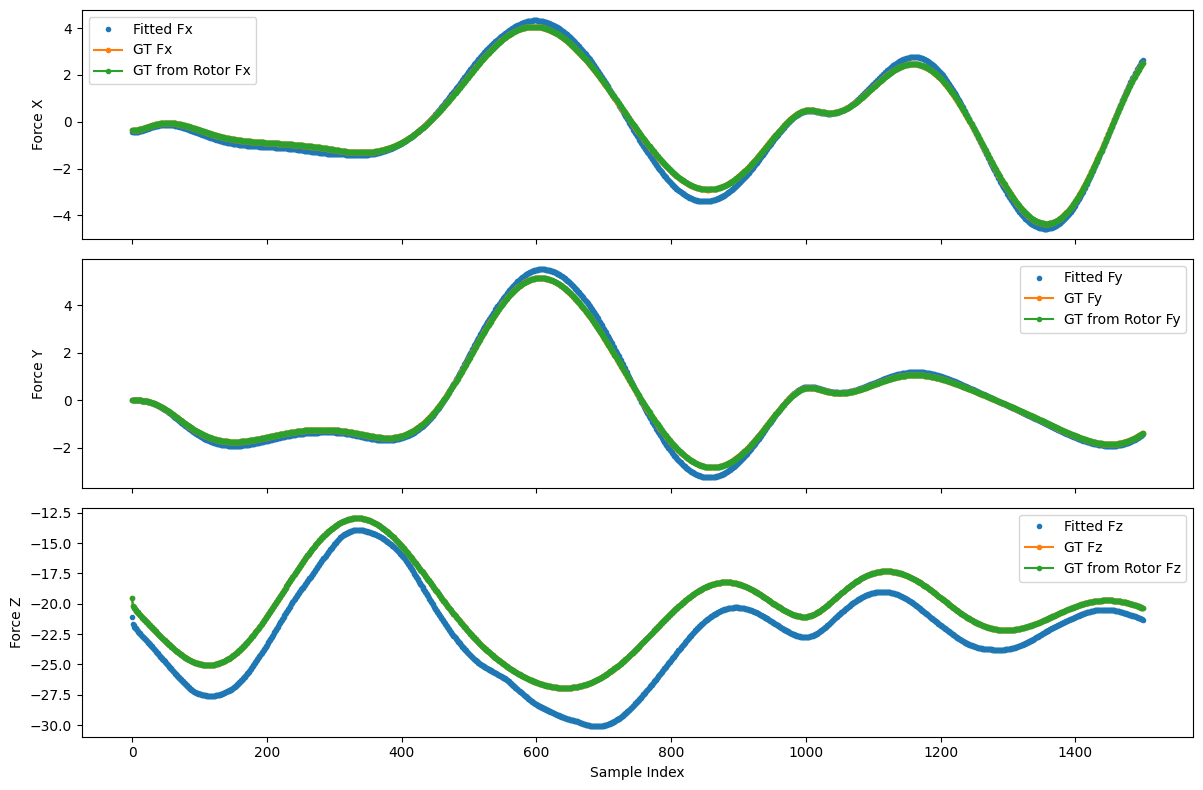

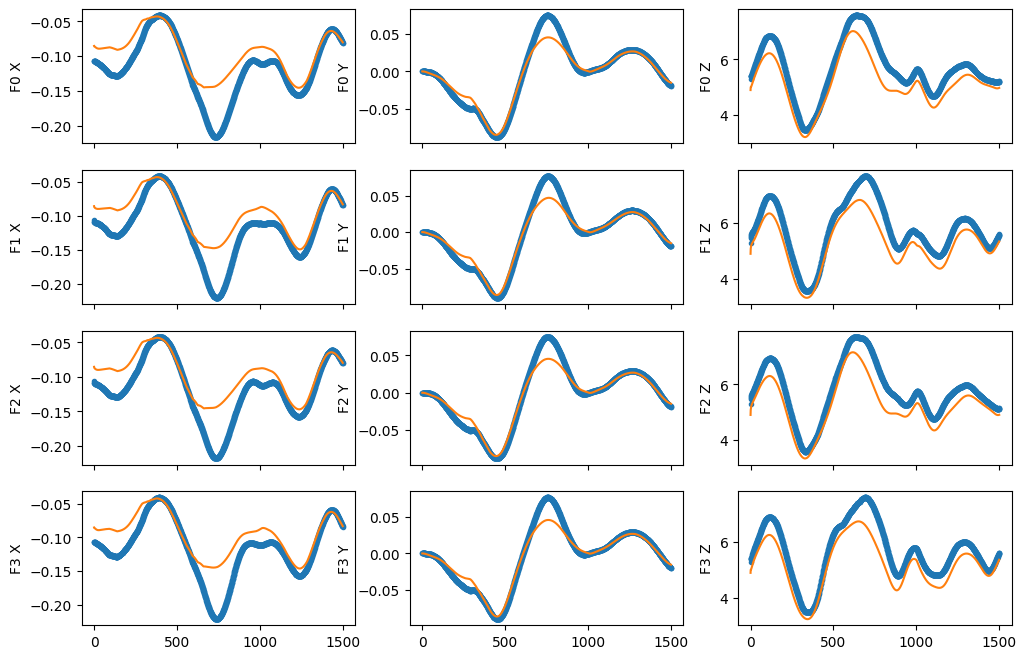

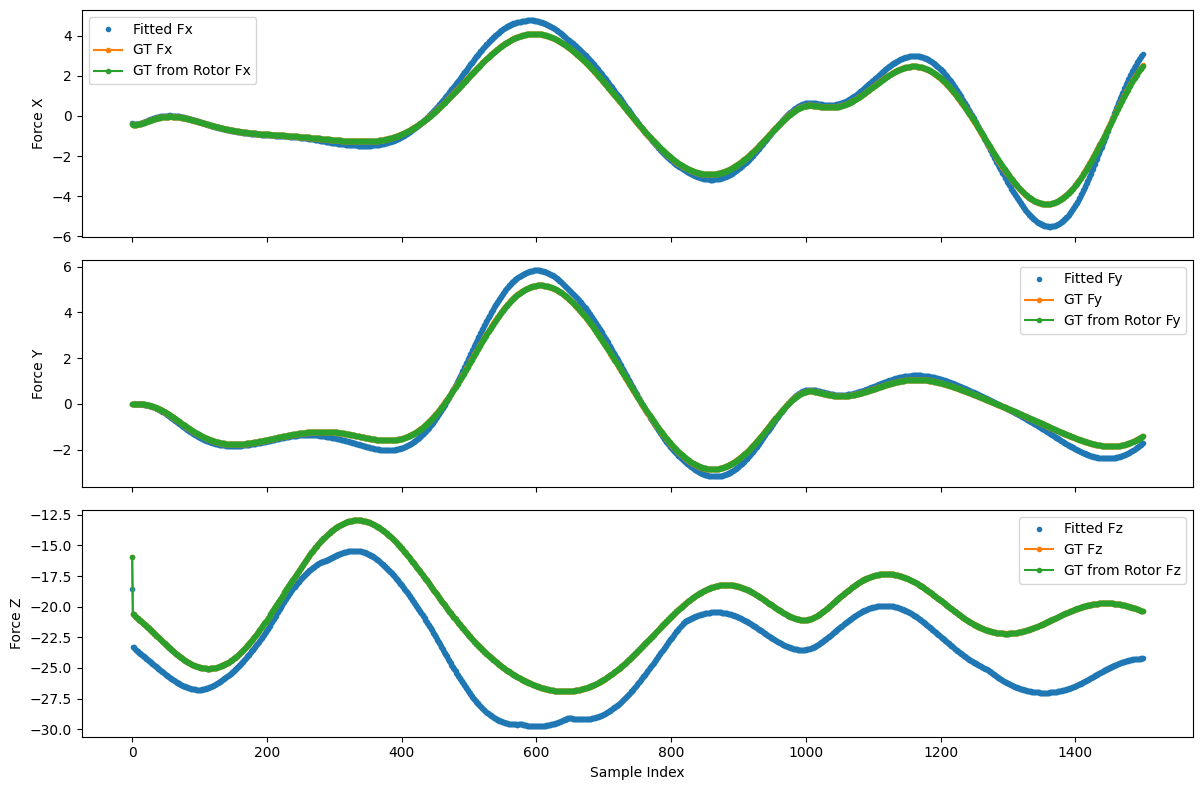

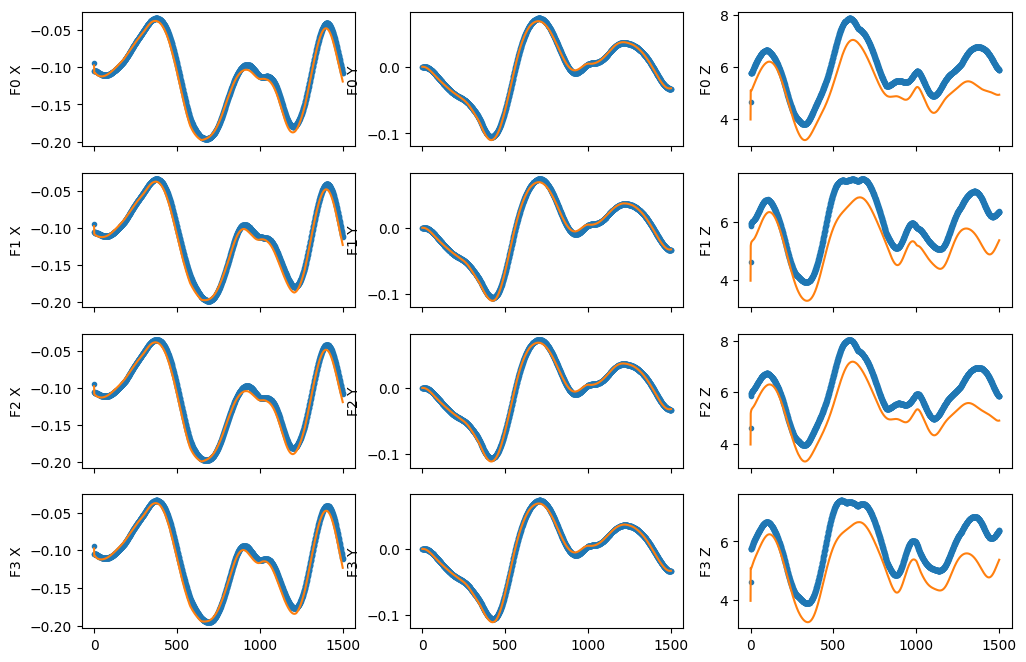

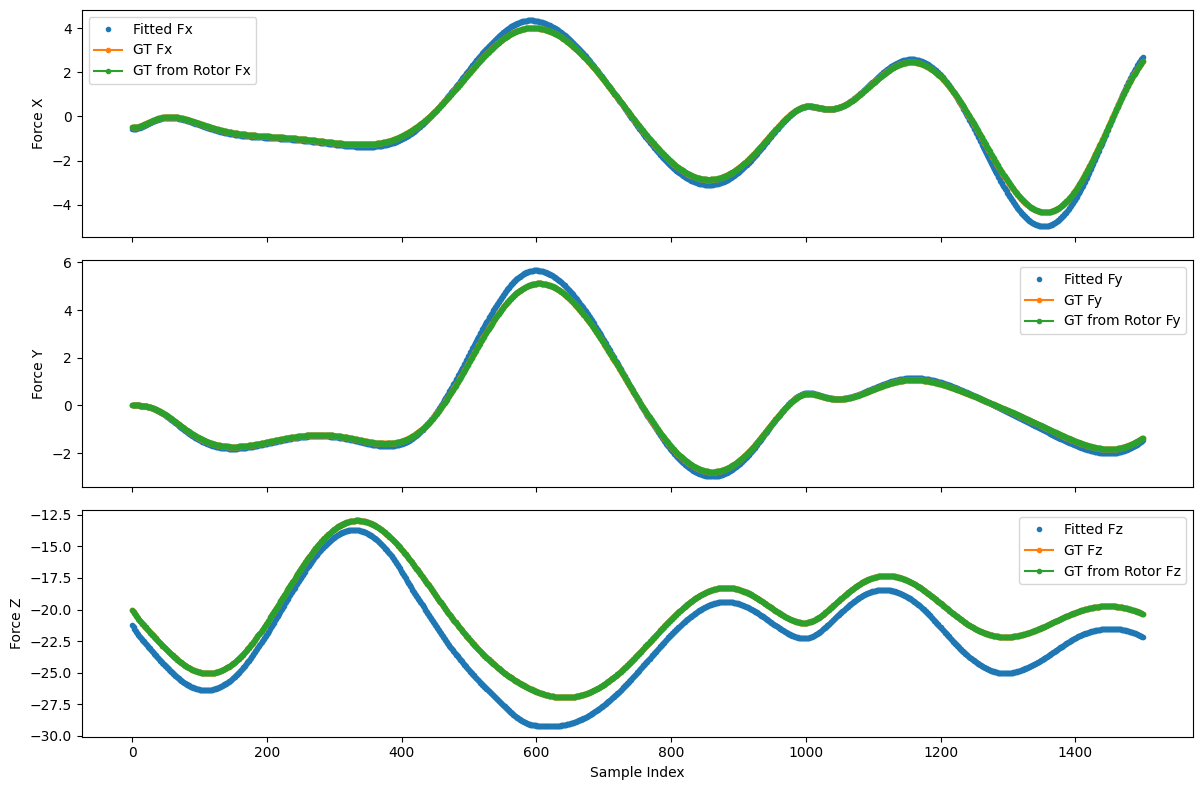

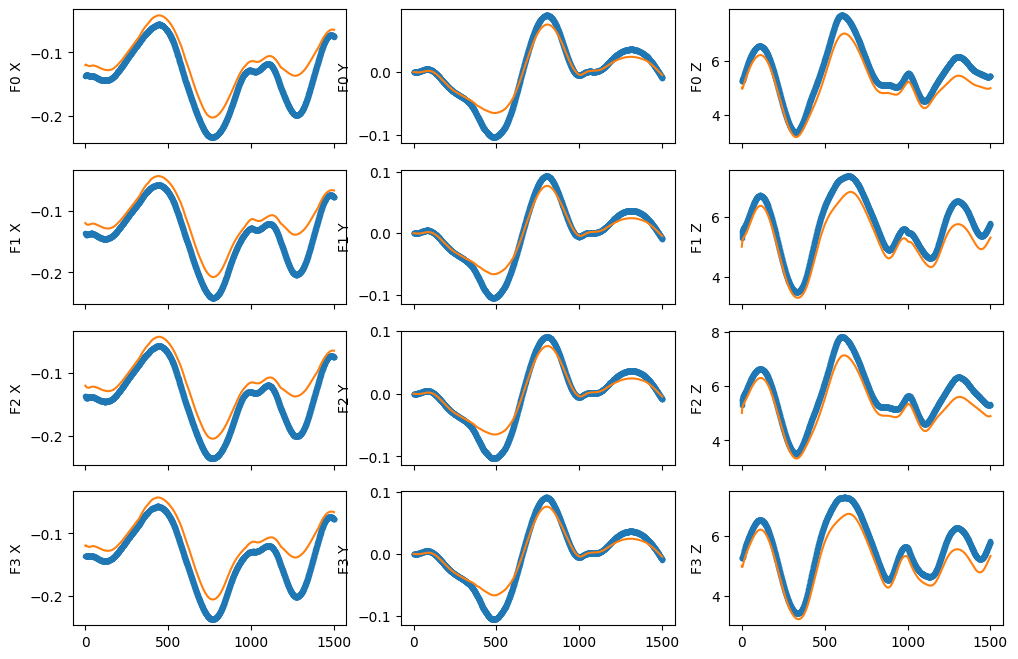

In [4]:
lookup_table = propeller_lookup_table.PropellerLookupTable.Reader("apc_8x6_fitted")
# lookup_table = propeller_lookup_table.PropellerLookupTable.Reader("apc_8x6_fitted2")
# lookup_table = propeller_lookup_table.PropellerLookupTable.Reader("apc_8x6_with_trail")
bemt_param_fitter.test_fitted_lookup_table(datasets, lookup_table)

In [ ]:
from inflow_model.bet import BladeElementTheory
blade = bemt_param_fitter.FittedBlade()
bet_instance = BladeElementTheory(blade, num_of_elements=20, num_of_rotation_segments=18)

u_free = np.array([0.0, 0, 0])
v_forward = np.array([1.3, 0, 0])
r_disk = bet_instance.pitch_rotor_disk_along_y_axis(np.radians(30))
is_ccw_blade = False
omega = 1000
# if not is_ccw_blade:
#     omega = -omega
print(bet_instance.get_rotor_forces(u_free, v_forward, r_disk, omega, True))
print(bet_instance.get_rotor_forces(u_free, v_forward, r_disk, -omega, False))

